In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset from a CSV file and create a DataFrame
penguins = pd.read_csv('penguins.csv')

In [3]:
# Output a message to provide information about the following actions.
print("Dataset Information: ")
print()
penguins.info()
print()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB



In [4]:
# Display the first few rows of the penguins DataFrame
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# Print descriptive statistics of the DataFrame, such as count, mean, and quartiles
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
# Check for null values in the entire DataFrame
are_null_values_present = penguins.isnull().any().any()

if are_null_values_present:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")


There are null values in the DataFrame.


In [7]:
numerical_columns = penguins.select_dtypes(include=[np.number])

# Check if there are any null values in the numerical columns
are_null_values_present = numerical_columns.isnull().any().any()

if are_null_values_present:
    print("There are null values in the numerical columns of the DataFrame.")
else:
    print("There are no null values in the numerical columns of the DataFrame.")


There are null values in the numerical columns of the DataFrame.


In [8]:
# Define a function to impute missing data in a DataFrame for a given field
def impute_missing_data(data_frame, field_name):
    data_frame[field_name] = pd.to_numeric(data_frame[field_name], errors='coerce')
    data_frame[field_name].fillna(data_frame[field_name].mean(), inplace=True)

# Call the impute_missing_data function for each column you want to process
impute_missing_data(penguins, 'bill_length_mm')
impute_missing_data(penguins, 'bill_depth_mm')
impute_missing_data(penguins, 'flipper_length_mm')
impute_missing_data(penguins, 'body_mass_g')
impute_missing_data(penguins, 'year')

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [9]:
numerical_columns = penguins.select_dtypes(include=[np.number])

# Check if there are any null values in the numerical columns
are_null_values_present = numerical_columns.isnull().any().any()

if are_null_values_present:
    print("There are null values in the numerical columns of the DataFrame.")
else:
    print("There are no null values in the numerical columns of the DataFrame.")

There are no null values in the numerical columns of the DataFrame.


In [10]:
# Define a function to convert all string columns to lowercase
def lowercase_strings(data_frame):
    data_frame[data_frame.select_dtypes(include='object').columns] = data_frame.select_dtypes(include='object').apply(lambda x: x.str.lower())

lowercase_strings(penguins)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,adelie,torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,adelie,torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,adelie,torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,adelie,torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,adelie,torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,chinstrap,dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,chinstrap,dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,chinstrap,dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,chinstrap,dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [11]:
# Define a function to remove outliers using the Z-score method
def remove_outliers_zscore(data_frame, field_name, z_thresh=3):
    z_scores = (data_frame[field_name] - data_frame[field_name].mean()) / data_frame[field_name].std()
    data_frame = data_frame[(np.abs(z_scores) < z_thresh)]
    return data_frame

# Make a copy of the 'penguins' DataFrame
data_frame = penguins.copy()

# Before removing outliers
print("Before removing outliers:")
print(data_frame)

numeric_columns = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']

for column in numeric_columns:
    data_frame = remove_outliers_zscore(data_frame, column)

# After removing outliers
print("After removing outliers:")
print(data_frame)

Before removing outliers:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       adelie  torgersen        39.10000       18.70000         181.000000   
1       adelie  torgersen        39.50000       17.40000         186.000000   
2       adelie  torgersen        40.30000       18.00000         195.000000   
3       adelie  torgersen        43.92193       17.15117         200.915205   
4       adelie  torgersen        36.70000       19.30000         193.000000   
..         ...        ...             ...            ...                ...   
339  chinstrap      dream        55.80000       19.80000         207.000000   
340  chinstrap      dream        43.50000       18.10000         202.000000   
341  chinstrap      dream        49.60000       18.20000         193.000000   
342  chinstrap      dream        50.80000       19.00000         210.000000   
343  chinstrap      dream        50.20000       18.70000         198.000000   

     body_mass_g     sex 

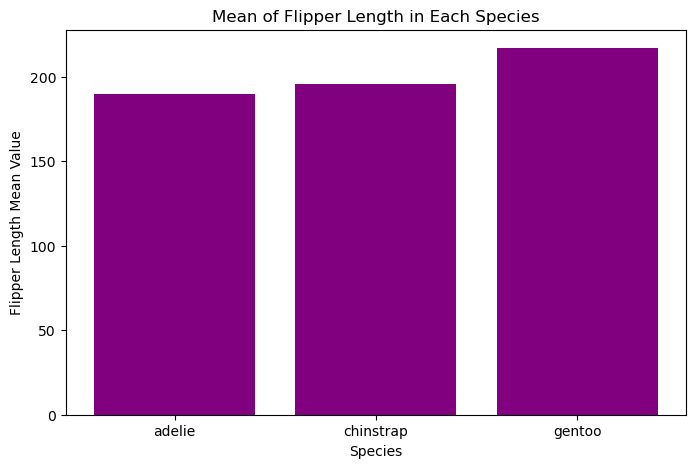

In [12]:
# Plot 1: Species vs Flipper Length Mean with color change
flipper_length_mean = penguins.groupby("species")[["flipper_length_mm"]].mean()
plt.figure(figsize=(8, 5))

plt.bar(flipper_length_mean.index, flipper_length_mean['flipper_length_mm'], color='purple')
plt.title("Mean of Flipper Length in Each Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length Mean Value")
plt.show()

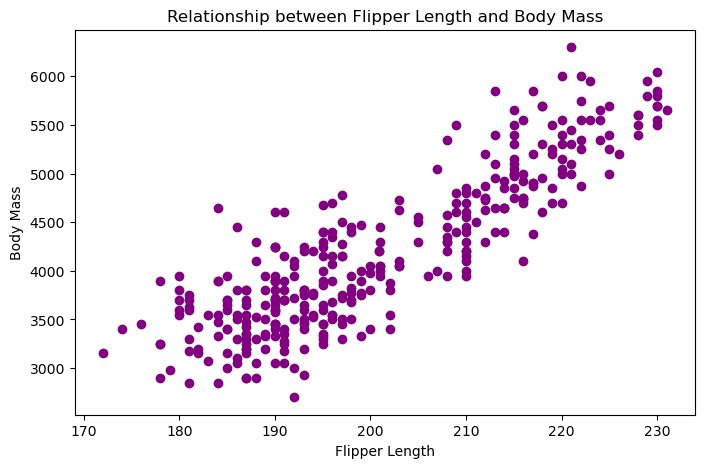

In [13]:
color_palette = ["purple"]
# Plot 2: Relationship between Flipper Length and Body Mass with the same color combination
plt.figure(figsize=(8, 5))
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'], c=color_palette[0])
plt.title("Relationship between Flipper Length and Body Mass")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.show()

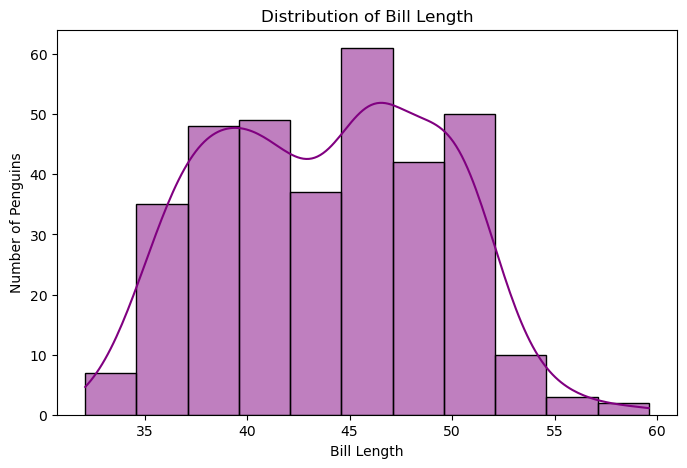

In [14]:
histplot_color = "purple"

# Plot 3: Distribution of Bill Length with a different color combination
plt.figure(figsize=(8, 5))
sns.histplot(penguins['bill_length_mm'], kde=True, color=histplot_color)
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length")
plt.ylabel("Number of Penguins")
plt.show()

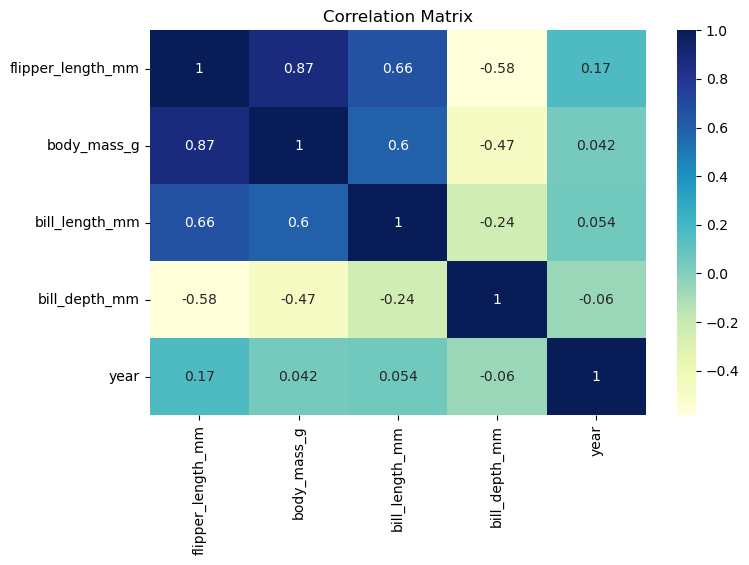

In [15]:
# Plot 4: Correlation Matrix Heatmap with a purple color
penguin_columns = penguins[['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'year']]
correlation_matrix = penguin_columns.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# Drop the 'year' column from the DataFrame
penguins.drop(['year'], axis=1, inplace=True)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,adelie,torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,adelie,torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,adelie,torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,adelie,torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,adelie,torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,chinstrap,dream,55.80000,19.80000,207.000000,4000.000000,male
340,chinstrap,dream,43.50000,18.10000,202.000000,3400.000000,female
341,chinstrap,dream,49.60000,18.20000,193.000000,3775.000000,male
342,chinstrap,dream,50.80000,19.00000,210.000000,4100.000000,male


In [17]:
# Define a function to perform label encoding and mode replacement
def label_encode_and_replace_mode(data_frame, column_name):
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
    mode_value = data_frame[data_frame[column_name] != -1][column_name].mode()[0]
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].replace(-1, mode_value)

# Apply label encoding and mode replacement to categorical columns
categorical_columns = ['species', 'sex', 'island']
for column in categorical_columns:
    label_encode_and_replace_mode(penguins, column)

penguins

C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_8324\3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_8324\3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_8324\3827997587.py:3: DeprecationWarning: In a fut

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,1,1,55.80000,19.80000,207.000000,4000.000000,1
340,1,1,43.50000,18.10000,202.000000,3400.000000,0
341,1,1,49.60000,18.20000,193.000000,3775.000000,1
342,1,1,50.80000,19.00000,210.000000,4100.000000,1


In [18]:
# Assuming you have a list of numerical column names and a DataFrame named 'penguins'.

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in numerical_columns:
    mean = penguins[column].mean()
    std = penguins[column].std()
    penguins[column] = (penguins[column] - mean) / std

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-8.857909e-01,0.786597,-1.420419,-0.564966,1
1,0,2,-8.123107e-01,0.126372,-1.063802,-0.502436,0
2,0,2,-6.653503e-01,0.431091,-0.421892,-1.190269,0
3,0,2,-1.305271e-15,0.000000,0.000000,0.000000,1
4,0,2,-1.326672e+00,1.091316,-0.564539,-0.940148,0
...,...,...,...,...,...,...,...
339,1,1,2.182007e+00,1.345248,0.433988,-0.252315,1
340,1,1,-7.750872e-02,0.481878,0.077371,-1.002678,0
341,1,1,1.043064e+00,0.532664,-0.564539,-0.533701,1
342,1,1,1.263505e+00,0.938956,0.647958,-0.127255,1


In [19]:
output_filename = "penguins_preprocessed.csv"
penguins.to_csv(output_filename, index=False)

# Print a message to confirm the file has been saved
print(f"DataFrame has been saved to '{output_filename}' without the index.")

DataFrame has been saved to 'penguins_preprocessed.csv' without the index.


In [20]:
penguins_processed = pd.read_csv('penguins_preprocessed.csv')

# Display dataset information
print("Dataset Information:")
print()
penguins_processed.info()

# Display dataset statistics
print("\nDataset Statistics:")
print()
penguins_statistics = penguins_processed.describe()
penguins_statistics

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB

Dataset Statistics:



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,344.000000
mean,0.918605,0.662791,-1.156697e-15,4.131062e-16,-8.262125e-16,8.262125e-17,0.520349
std,0.893320,0.726194,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500313
min,0.000000,0.000000,-2.171694e+00,-2.057447e+00,-2.062329e+00,-1.878101e+00,0.000000
25%,0.000000,0.000000,-8.536433e-01,-7.877847e-01,-7.785088e-01,-8.150872e-01,0.000000
50%,1.000000,1.000000,6.026666e-02,7.558575e-02,-2.792454e-01,-1.897848e-01,1.000000
75%,2.000000,1.000000,8.409938e-01,7.865967e-01,8.619279e-01,6.856386e-01,1.000000
max,2.000000,2.000000,2.880069e+00,2.208619e+00,2.145748e+00,2.624076e+00,1.000000


In [21]:
# Taking gender as a target variable.
X_data = penguins_processed.drop('sex', axis=1)
Y_target = penguins_processed['sex']

print("X_data Shape: ", X_data.shape)
print("Y_target Shape: ", Y_target.shape)

X_data Shape:  (344, 6)
Y_target Shape:  (344,)


In [22]:
# Calculate the number of samples for training (80%) and testing (20%)
training_samples = int(np.round(len(X_data) * 0.8))
testing_samples = len(X_data) - training_samples

# Slice the data for training and testing
X_train = X_data[:training_samples]
X_test = X_data[-testing_samples:]
Y_train = Y_target[:training_samples]
Y_test = Y_target[-testing_samples:]

# Print the shapes of the training and testing datasets
print("Training Data Shapes:")
print("X_train Shape:", X_train.shape)
print("Y_train Shape:", Y_train.shape)
print()
print("Testing Data Shapes:")
print("X_test Shape:", X_test.shape)
print("Y_test Shape:", Y_test.shape)

Training Data Shapes:
X_train Shape: (275, 6)
Y_train Shape: (275,)

Testing Data Shapes:
X_test Shape: (69, 6)
Y_test Shape: (69,)


Iteration 0: Loss = 0.7828440497734319


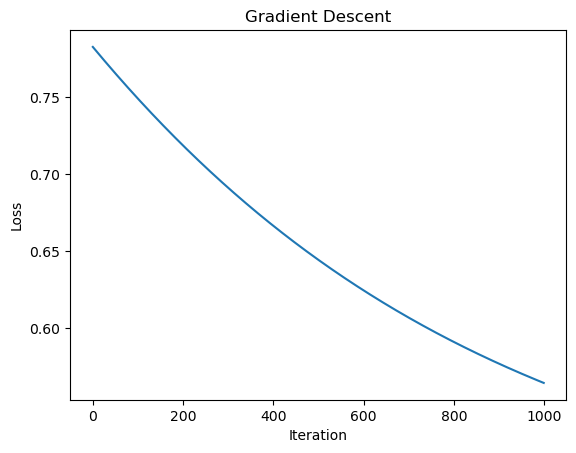

Iteration 0: Loss = 0.778626292647675


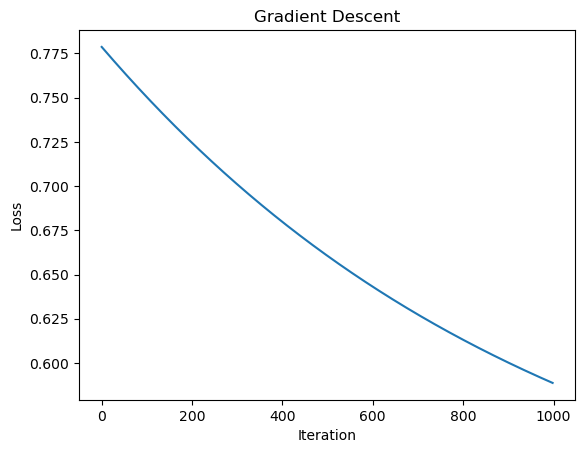


Learning Rate: 0.001, Iterations: 1000, Accuracy: 86.96%

Iteration 0: Loss = 0.6525384135065807
Iteration 1000: Loss = 0.5135172842628931
Iteration 2000: Loss = 0.4609537446500627
Iteration 3000: Loss = 0.43413011009822267
Iteration 4000: Loss = 0.41579642949248746
Iteration 5000: Loss = 0.40142294302259723
Iteration 6000: Loss = 0.3895593947476643
Iteration 7000: Loss = 0.3795398118777174
Iteration 8000: Loss = 0.3709560229223509
Iteration 9000: Loss = 0.3635206730087612


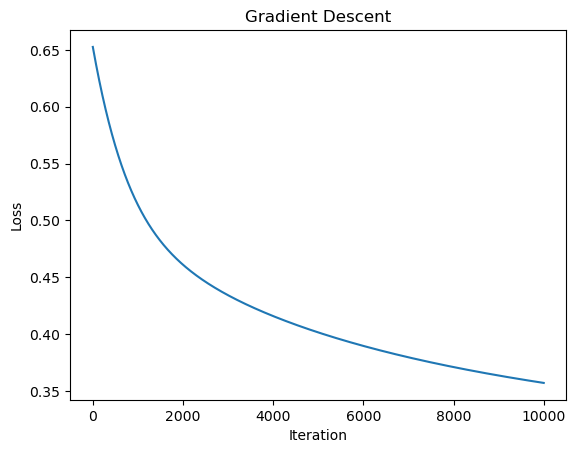

Iteration 0: Loss = 0.6426461691586084
Iteration 1000: Loss = 0.562202351575761
Iteration 2000: Loss = 0.5150030754155909
Iteration 3000: Loss = 0.4811382726830069
Iteration 4000: Loss = 0.4548238332097618
Iteration 5000: Loss = 0.4337087851218907
Iteration 6000: Loss = 0.4164391560412336
Iteration 7000: Loss = 0.4020990449740262
Iteration 8000: Loss = 0.39003325185023474
Iteration 9000: Loss = 0.37976134801552863


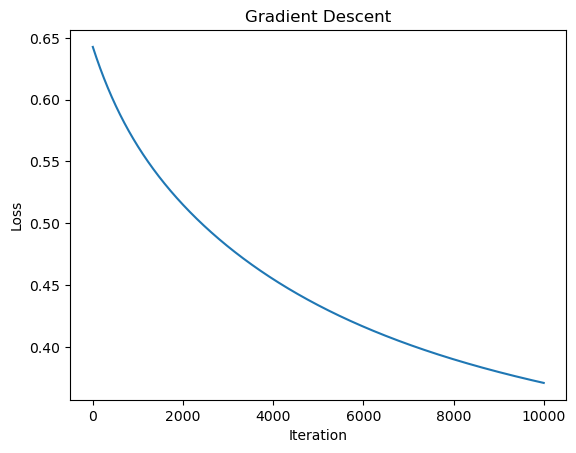


Learning Rate: 0.001, Iterations: 10000, Accuracy: 86.96%

Iteration 0: Loss = 0.5835599267262604
Iteration 1000: Loss = 0.4554830158128022
Iteration 2000: Loss = 0.41299913123041704
Iteration 3000: Loss = 0.3934403870226486
Iteration 4000: Loss = 0.38061284584748656
Iteration 5000: Loss = 0.3706271155741776
Iteration 6000: Loss = 0.36234521260009267
Iteration 7000: Loss = 0.35528675449981423
Iteration 8000: Loss = 0.3491737351052291
Iteration 9000: Loss = 0.3438167555563188
Iteration 10000: Loss = 0.3390773148263624
Iteration 11000: Loss = 0.3348504806286552
Iteration 12000: Loss = 0.33105489514813197
Iteration 13000: Loss = 0.3276263180170729
Iteration 14000: Loss = 0.3245132242127919
Iteration 15000: Loss = 0.3216737109058916
Iteration 16000: Loss = 0.3190732769025226
Iteration 17000: Loss = 0.3166831996912952
Iteration 18000: Loss = 0.314479329986585
Iteration 19000: Loss = 0.31244118292719925
Iteration 20000: Loss = 0.3105512433493941
Iteration 21000: Loss = 0.3087944277927395
It

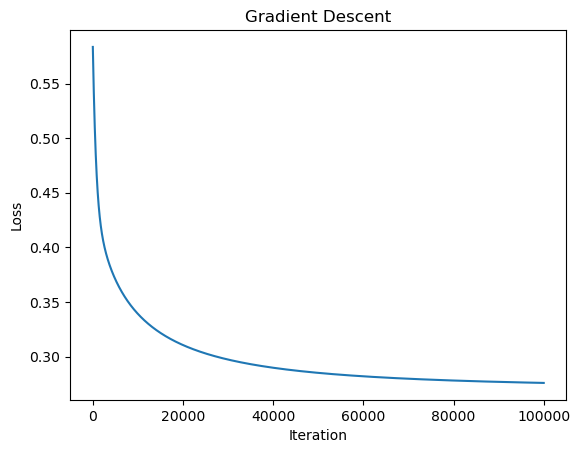

Iteration 0: Loss = 0.48793937567957796
Iteration 1000: Loss = 0.4590733579960334
Iteration 2000: Loss = 0.43647968312217894
Iteration 3000: Loss = 0.41833675061206566
Iteration 4000: Loss = 0.4034924214165867
Iteration 5000: Loss = 0.39115273176184295
Iteration 6000: Loss = 0.38075063185328817
Iteration 7000: Loss = 0.3718726501248992
Iteration 8000: Loss = 0.36421213175875367
Iteration 9000: Loss = 0.3575379837095716
Iteration 10000: Loss = 0.35167336826202367
Iteration 11000: Loss = 0.34648098110466113
Iteration 12000: Loss = 0.3418527469985027
Iteration 13000: Loss = 0.3377025109022146
Iteration 14000: Loss = 0.3339607829299296
Iteration 15000: Loss = 0.3305709084703153
Iteration 16000: Loss = 0.3274862396936643
Iteration 17000: Loss = 0.32466801969807896
Iteration 18000: Loss = 0.322083780267326
Iteration 19000: Loss = 0.3197061144140064
Iteration 20000: Loss = 0.31751172570640857
Iteration 21000: Loss = 0.3154806843713792
Iteration 22000: Loss = 0.3135958395793893
Iteration 23000

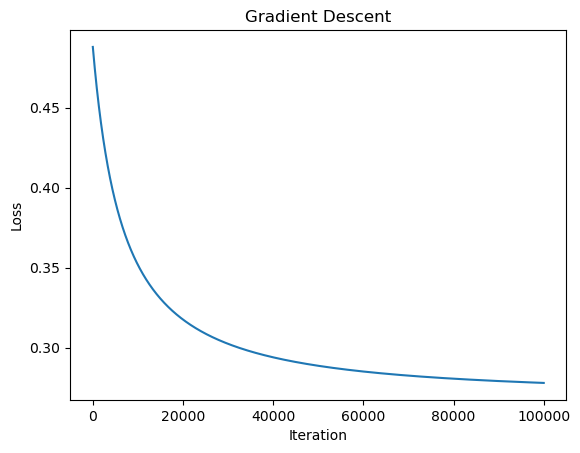


Learning Rate: 0.001, Iterations: 100000, Accuracy: 88.41%

Iteration 0: Loss = 0.48763985145177086


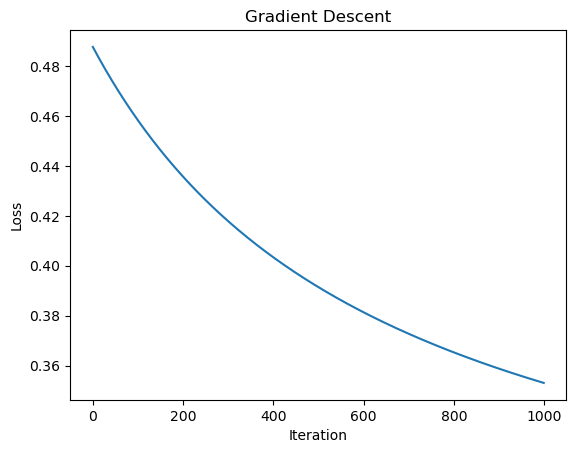

Iteration 0: Loss = 0.49975311755215507


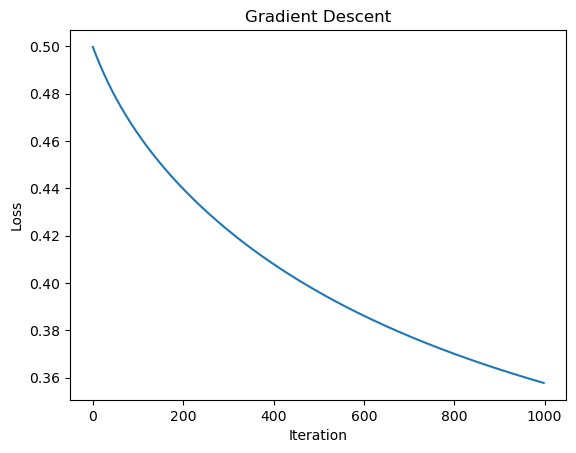


Learning Rate: 0.01, Iterations: 1000, Accuracy: 86.96%

Iteration 0: Loss = 0.6757391896530603
Iteration 1000: Loss = 0.3642532386504058
Iteration 2000: Loss = 0.32141688926167034
Iteration 3000: Loss = 0.30336074442811567
Iteration 4000: Loss = 0.29368351872178394
Iteration 5000: Loss = 0.2877994393803887
Iteration 6000: Loss = 0.28392238120871854
Iteration 7000: Loss = 0.2812191559889632
Iteration 8000: Loss = 0.27925285032640806
Iteration 9000: Loss = 0.277774492093721


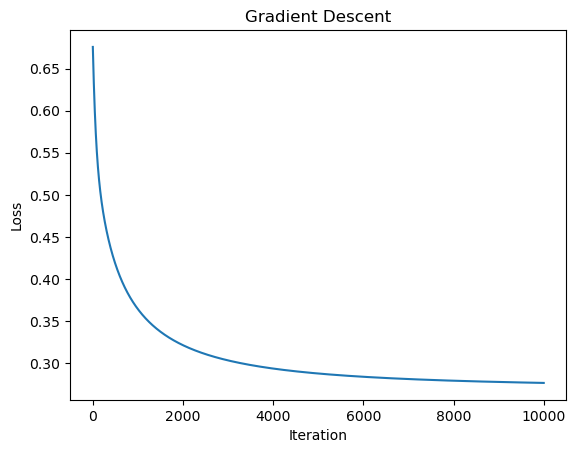

Iteration 0: Loss = 0.5220219945955634
Iteration 1000: Loss = 0.3569336860635846
Iteration 2000: Loss = 0.32153530048901896
Iteration 3000: Loss = 0.3051580500545745
Iteration 4000: Loss = 0.29583850283230756
Iteration 5000: Loss = 0.28990674347832296
Iteration 6000: Loss = 0.2858519866464033
Iteration 7000: Loss = 0.2829388079127404
Iteration 8000: Loss = 0.28076716476005675
Iteration 9000: Loss = 0.27910147250851153


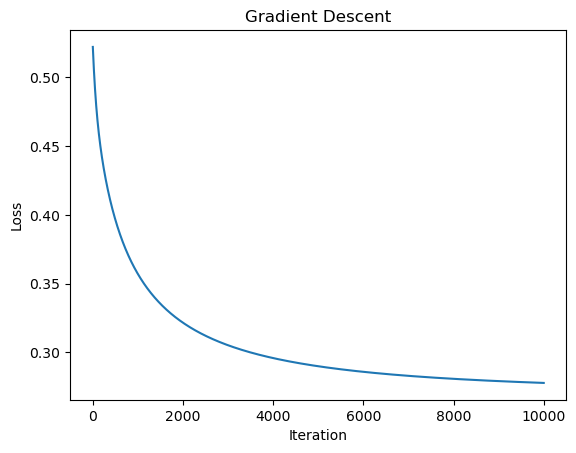


Learning Rate: 0.01, Iterations: 10000, Accuracy: 88.41%

Iteration 0: Loss = 0.5714797274327594
Iteration 1000: Loss = 0.3495262467944199
Iteration 2000: Loss = 0.3162730312811058
Iteration 3000: Loss = 0.3014229593615264
Iteration 4000: Loss = 0.29311165505166026
Iteration 5000: Loss = 0.2878607646433766
Iteration 6000: Loss = 0.2842831221545717
Iteration 7000: Loss = 0.28171562208156997
Iteration 8000: Loss = 0.2798012345442139
Iteration 9000: Loss = 0.2783310293516649
Iteration 10000: Loss = 0.2771749888169978
Iteration 11000: Loss = 0.2762482669427698
Iteration 12000: Loss = 0.2754933460798615
Iteration 13000: Loss = 0.2748699882858886
Iteration 14000: Loss = 0.2743492851633565
Iteration 15000: Loss = 0.2739099868775705
Iteration 16000: Loss = 0.2735361581421529
Iteration 17000: Loss = 0.27321563695944323
Iteration 18000: Loss = 0.2729389950680196
Iteration 19000: Loss = 0.2726988208904019
Iteration 20000: Loss = 0.27248921495216205
Iteration 21000: Loss = 0.272305428369888
Itera

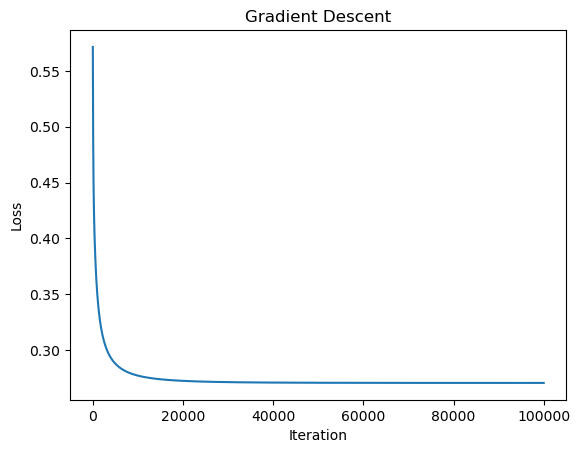

Iteration 0: Loss = 0.5366424353118885
Iteration 1000: Loss = 0.36106256948371657
Iteration 2000: Loss = 0.3220671807657518
Iteration 3000: Loss = 0.3050800588697873
Iteration 4000: Loss = 0.29577062911914925
Iteration 5000: Loss = 0.2899911802440702
Iteration 6000: Loss = 0.28610334284795635
Iteration 7000: Loss = 0.2833350784698912
Iteration 8000: Loss = 0.2812779104060009
Iteration 9000: Loss = 0.27969715693715796
Iteration 10000: Loss = 0.2784493643657538
Iteration 11000: Loss = 0.2774424673203596
Iteration 12000: Loss = 0.2766149914646162
Iteration 13000: Loss = 0.2759245037164805
Iteration 14000: Loss = 0.2753408694678744
Iteration 15000: Loss = 0.2748421503896819
Iteration 16000: Loss = 0.2744120205748743
Iteration 17000: Loss = 0.27403808994417905
Iteration 18000: Loss = 0.2737107878623654
Iteration 19000: Loss = 0.2734226026291436
Iteration 20000: Loss = 0.2731675527262929
Iteration 21000: Loss = 0.2729408123465045
Iteration 22000: Loss = 0.27273844166887723
Iteration 23000: L

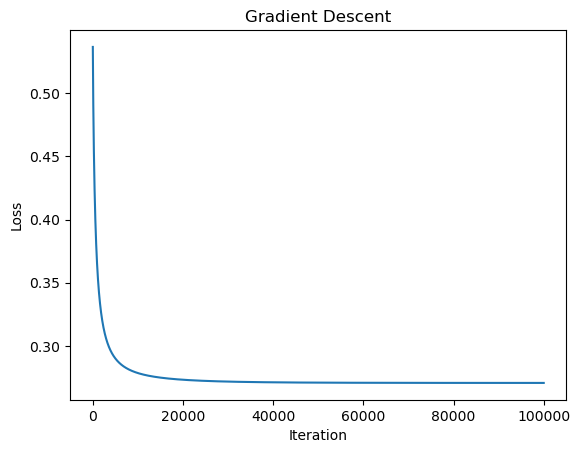


Learning Rate: 0.01, Iterations: 100000, Accuracy: 88.41%

Iteration 0: Loss = 0.9206297450620269


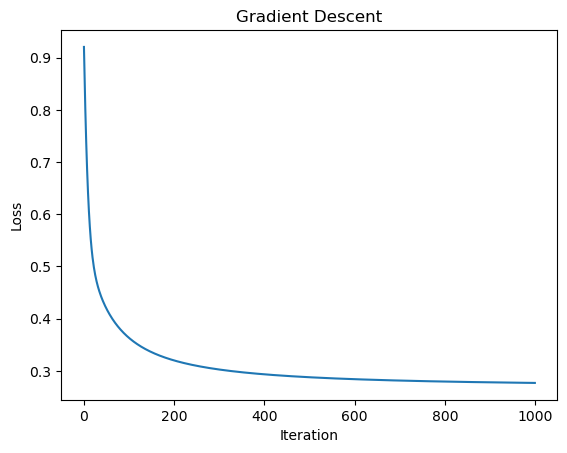

Iteration 0: Loss = 0.6066373332845131


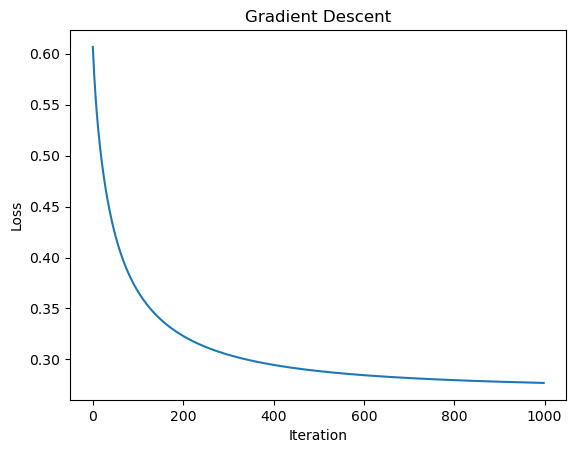


Learning Rate: 0.1, Iterations: 1000, Accuracy: 88.41%

Iteration 0: Loss = 0.5063749135881109
Iteration 1000: Loss = 0.27831360976436026
Iteration 2000: Loss = 0.27293364300082334
Iteration 3000: Loss = 0.27155634905326853
Iteration 4000: Loss = 0.27105253863867307
Iteration 5000: Loss = 0.2708383486093164
Iteration 6000: Loss = 0.27073970109439977
Iteration 7000: Loss = 0.27069214556681565
Iteration 8000: Loss = 0.2706685990352731
Iteration 9000: Loss = 0.27065675333882816


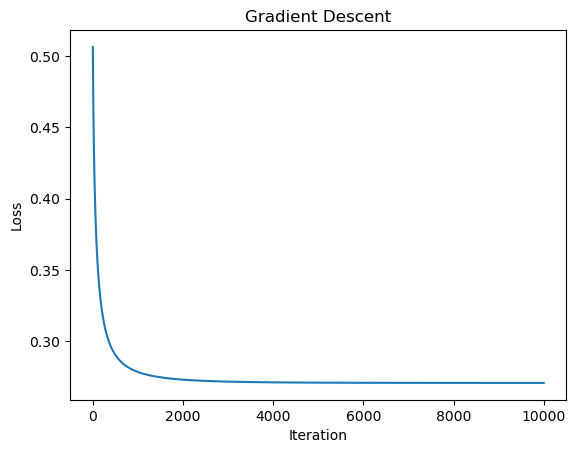

Iteration 0: Loss = 0.8671529195090836
Iteration 1000: Loss = 0.2769534848488024
Iteration 2000: Loss = 0.2725792780801459
Iteration 3000: Loss = 0.2714444954560092
Iteration 4000: Loss = 0.27101094964883143
Iteration 5000: Loss = 0.27082093566955723
Iteration 6000: Loss = 0.27073180907643624
Iteration 7000: Loss = 0.27068838341248663
Iteration 8000: Loss = 0.2706667487079514
Iteration 9000: Loss = 0.2706558258729505


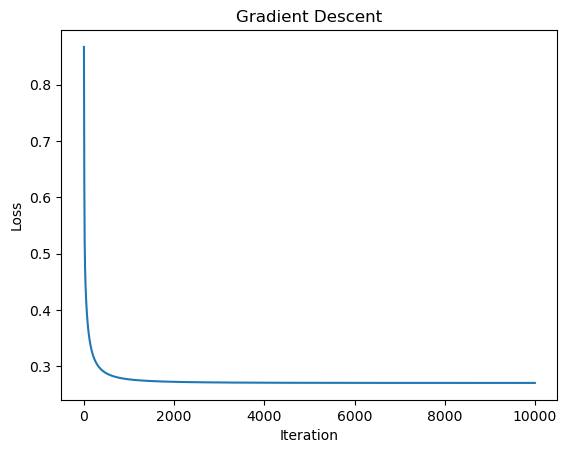


Learning Rate: 0.1, Iterations: 10000, Accuracy: 88.41%

Iteration 0: Loss = 0.5711167475555197
Iteration 1000: Loss = 0.27906886397312786
Iteration 2000: Loss = 0.27336083506132686
Iteration 3000: Loss = 0.2717751476661348
Iteration 4000: Loss = 0.27116196218399036
Iteration 5000: Loss = 0.2708931664594183
Iteration 6000: Loss = 0.2707673403301
Iteration 7000: Loss = 0.27070616495308647
Iteration 8000: Loss = 0.2706757433596834
Iteration 9000: Loss = 0.27066040682190534
Iteration 10000: Loss = 0.2706526097272025
Iteration 11000: Loss = 0.2706486246857582
Iteration 12000: Loss = 0.2706465810779607
Iteration 13000: Loss = 0.27064553077591347
Iteration 14000: Loss = 0.2706449901955344
Iteration 15000: Loss = 0.27064471169308746
Iteration 16000: Loss = 0.270644568115891
Iteration 17000: Loss = 0.2706444940633385
Iteration 18000: Loss = 0.27064445585727503
Iteration 19000: Loss = 0.27064443614117606
Iteration 20000: Loss = 0.27064442596516364
Iteration 21000: Loss = 0.2706444207124666
Ite

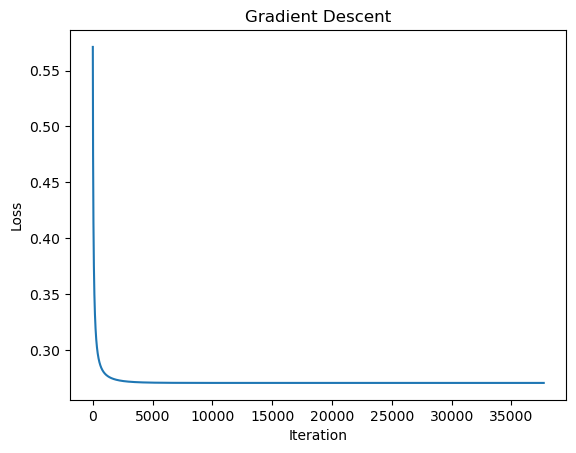

Iteration 0: Loss = 0.555482283177609
Iteration 1000: Loss = 0.2787163202693068
Iteration 2000: Loss = 0.2731740295700165
Iteration 3000: Loss = 0.2716767549902311
Iteration 4000: Loss = 0.2711115314586955
Iteration 5000: Loss = 0.2708675000523172
Iteration 6000: Loss = 0.27075427865964635
Iteration 7000: Loss = 0.2706995050993167
Iteration 8000: Loss = 0.2706723398219528
Iteration 9000: Loss = 0.2706586636814405
Iteration 10000: Loss = 0.2706517153227107
Iteration 11000: Loss = 0.27064816507846906
Iteration 12000: Loss = 0.27064634461980547
Iteration 13000: Loss = 0.2706454090117965
Iteration 14000: Loss = 0.2706449274494252
Iteration 15000: Loss = 0.27064467934254816
Iteration 16000: Loss = 0.2706445514301546
Iteration 17000: Loss = 0.2706444854547059
Iteration 18000: Loss = 0.2706444514149049
Iteration 19000: Loss = 0.27064443384839604
Iteration 20000: Loss = 0.2706444247816891
Iteration 21000: Loss = 0.27064442010153716
Iteration 22000: Loss = 0.2706444176855033
Iteration 23000: Lo

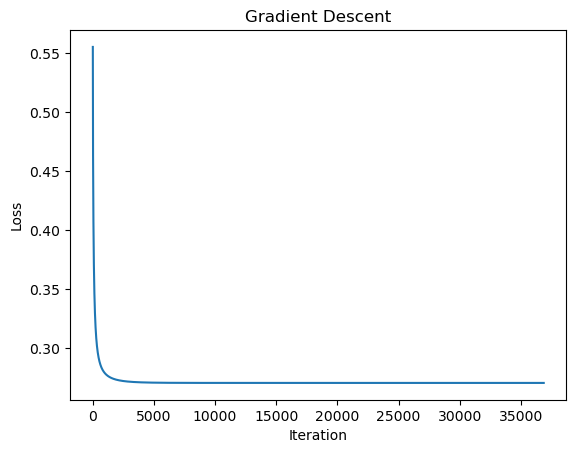


Learning Rate: 0.1, Iterations: 100000, Accuracy: 88.41%



Best Hyperparameters: Learning Rate: 0.001, Iterations: 100000, Best Accuracy: 88.41%




In [24]:
class LogitRegression():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, feature):
        return 1 / (1 + np.exp(-feature))

    def cost(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias
        h = self.sigmoid(z)

        parameter1 = -(y_train) * np.log(h)
        parameter2 = (1 - y_train) * np.log(1 - h)

        j = (1 / len(y_train)) * np.sum(parameter1 - parameter2)

        return j

    def gradient_descent(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias
        pred = self.sigmoid(z)

        difference_y = pred - y_train

        update_weight = np.dot(x_train.T, difference_y) / len(y_train)
        update_bias = np.sum(difference_y) / len(y_train)

        return update_weight, update_bias

    def scaling(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        return X_scaled

    def fit(self, x_train, y_train):
        X_scaled = self.scaling(x_train)
        rows, features = X_scaled.shape
        self.weights = np.random.uniform(0, 1, features)
        self.bias = 0.5
        loss = []

        for i in range(self.iterations):
            updated_weights, updated_bias = self.gradient_descent(y_train, X_scaled)
            loss.append(self.cost(y_train, X_scaled))

            self.weights = self.weights - (self.learning_rate * updated_weights)
            self.bias = self.bias - (self.learning_rate * updated_bias)

            if i % 1000 == 0:
                print(f"Iteration {i}: Loss = {loss[-1]}")

            # Implement early stopping based on the loss curve
            if i > 0 and loss[i] > loss[i - 1]:
                break
        plt.plot(range(len(loss)), loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Gradient Descent')
        plt.show()
        return loss

    def predict(self, x_test):
        X_scaled = self.scaling(x_test)

        z = np.dot(X_scaled, self.weights.T) + self.bias
        y_hat = self.sigmoid(z)

        y_pred = []

        for y_value in y_hat:
            if y_value >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred

def accuracy(y_test, y_pred):
    matched_values = np.sum(y_test == y_pred)
    return matched_values / len(y_test)

# Define a list of learning rates and iterations to try
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [1000, 10000, 100000]

best_accuracy = 0.0
best_hyperparameters = None

for learning_rate in learning_rates:
    for iterations in iterations_list:
        logistic_model = LogitRegression(learning_rate, iterations)
        loss_values = logistic_model.fit(X_train, Y_train)

        # Implement early stopping based on the loss curve
        best_iteration = np.argmin(loss_values)

        logistic_model = LogitRegression(learning_rate, best_iteration)
        logistic_model.fit(X_train, Y_train)

        predict = logistic_model.predict(X_test)

        accu = accuracy(Y_test, predict)
        print("\nLearning Rate: {}, Iterations: {}, Accuracy: {:.2f}%\n".format(learning_rate, iterations, accu * 100))

        if accu > best_accuracy:
            best_accuracy = accu
            best_hyperparameters = (learning_rate, iterations)

print("\n\nBest Hyperparameters: Learning Rate: {}, Iterations: {}, Best Accuracy: {:.2f}%\n\n".format(
    best_hyperparameters[0], best_hyperparameters[1], best_accuracy * 100))


Iteration 0: Loss = 0.6871968134744824
Iteration 1000: Loss = 0.5703657215728202
Iteration 2000: Loss = 0.514978823223547
Iteration 3000: Loss = 0.47986307785118937
Iteration 4000: Loss = 0.4536006940369051
Iteration 5000: Loss = 0.4327023251428537
Iteration 6000: Loss = 0.41562612227525775
Iteration 7000: Loss = 0.40144019885199894
Iteration 8000: Loss = 0.38949788589930967
Iteration 9000: Loss = 0.3793273391579826


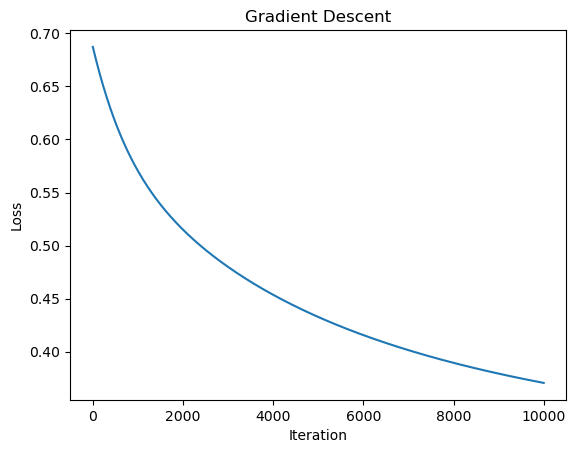

Learning Rate: 0.001, Iterations: 10000, Trained Weight Vectors: [0.02319628 0.56221059 0.54907504 1.35691363 0.31582922 1.14190479]
Iteration 0: Loss = 0.7613286433793651
Iteration 1000: Loss = 0.5476898407822026
Iteration 2000: Loss = 0.4770005572054164
Iteration 3000: Loss = 0.4454941064583448
Iteration 4000: Loss = 0.4251088285928168
Iteration 5000: Loss = 0.4094552610377146
Iteration 6000: Loss = 0.3966880836395296
Iteration 7000: Loss = 0.38598983005116294
Iteration 8000: Loss = 0.3768693731588644
Iteration 9000: Loss = 0.3689898381023464
Iteration 10000: Loss = 0.36210704698189666
Iteration 11000: Loss = 0.35603856835177344
Iteration 12000: Loss = 0.3506450586643325
Iteration 13000: Loss = 0.3458180945874611
Iteration 14000: Loss = 0.341471925231444
Iteration 15000: Loss = 0.3375377383951558
Iteration 16000: Loss = 0.33395959225532723
Iteration 17000: Loss = 0.33069147577903935
Iteration 18000: Loss = 0.32769514889801804
Iteration 19000: Loss = 0.3249385308167624
Iteration 20000

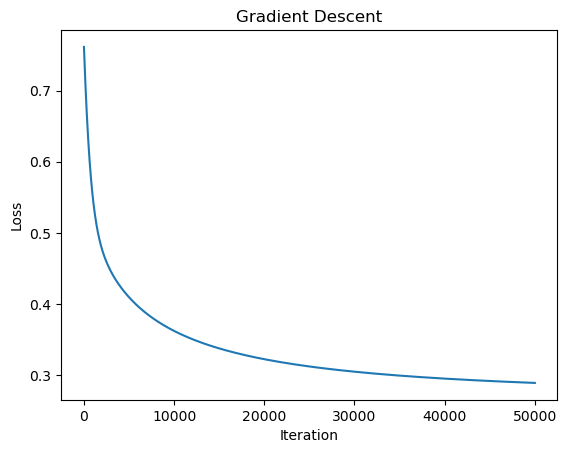

Learning Rate: 0.001, Iterations: 50000, Trained Weight Vectors: [-0.68984897  0.13945118  1.18509014  2.39978761  0.39480724  1.936158  ]
Iteration 0: Loss = 0.6782557435884893
Iteration 1000: Loss = 0.5809300118060196
Iteration 2000: Loss = 0.5273972485897994
Iteration 3000: Loss = 0.49018422773113396
Iteration 4000: Loss = 0.4619926622102125
Iteration 5000: Loss = 0.4398195651019279
Iteration 6000: Loss = 0.4219405441391534
Iteration 7000: Loss = 0.4072317183464554
Iteration 8000: Loss = 0.3949239987971407
Iteration 9000: Loss = 0.3844753831164881
Iteration 10000: Loss = 0.37549451571968717
Iteration 11000: Loss = 0.36769254665827084
Iteration 12000: Loss = 0.36085196494516586
Iteration 13000: Loss = 0.35480596537213216
Iteration 14000: Loss = 0.3494245003527843
Iteration 15000: Loss = 0.34460466054427924
Iteration 16000: Loss = 0.3402639135958016
Iteration 17000: Loss = 0.3363352660315992
Iteration 18000: Loss = 0.33276374287912547
Iteration 19000: Loss = 0.32950378597695007
Iterat

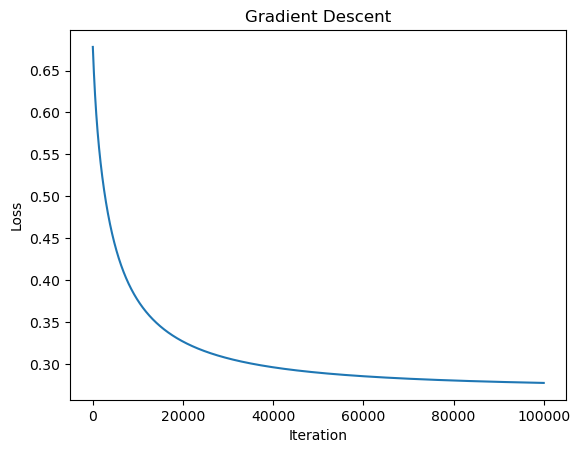

Learning Rate: 0.001, Iterations: 100000, Trained Weight Vectors: [-0.93385522  0.13742667  1.57514299  2.69320704  0.16072436  2.39519483]
Iteration 0: Loss = 0.7594181575220648
Iteration 1000: Loss = 0.3587678648382317
Iteration 2000: Loss = 0.31970301434041315
Iteration 3000: Loss = 0.3028345502645736
Iteration 4000: Loss = 0.2936698072382406
Iteration 5000: Loss = 0.28804485256546153
Iteration 6000: Loss = 0.2843100700132961
Iteration 7000: Loss = 0.28168755509259913
Iteration 8000: Loss = 0.27976640661869595
Iteration 9000: Loss = 0.27831128746986883


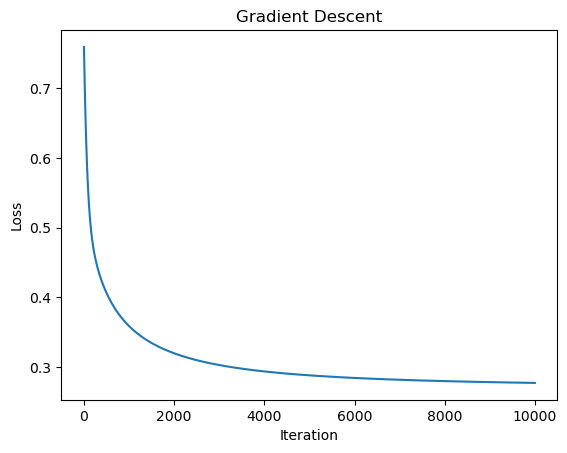

Learning Rate: 0.01, Iterations: 10000, Trained Weight Vectors: [-0.70785031  0.16728902  1.5967428   2.79112492 -0.01889136  2.43192408]
Iteration 0: Loss = 0.794642951389824
Iteration 1000: Loss = 0.35355084734092185
Iteration 2000: Loss = 0.31708506970422107
Iteration 3000: Loss = 0.30115280159684166
Iteration 4000: Loss = 0.2924589163989308
Iteration 5000: Loss = 0.28711770042936285
Iteration 6000: Loss = 0.2835738671125054
Iteration 7000: Loss = 0.2810894165003532
Iteration 8000: Loss = 0.2792730538248595
Iteration 9000: Loss = 0.2779001898537837
Iteration 10000: Loss = 0.27683395637537545
Iteration 11000: Loss = 0.27598691380310664
Iteration 12000: Loss = 0.2753010160924789
Iteration 13000: Loss = 0.2747364761471967
Iteration 14000: Loss = 0.2742652669427945
Iteration 15000: Loss = 0.2738671711113618
Iteration 16000: Loss = 0.27352729594916747
Iteration 17000: Loss = 0.27323446371295557
Iteration 18000: Loss = 0.27298014201611986
Iteration 19000: Loss = 0.27275771702623314
Iterat

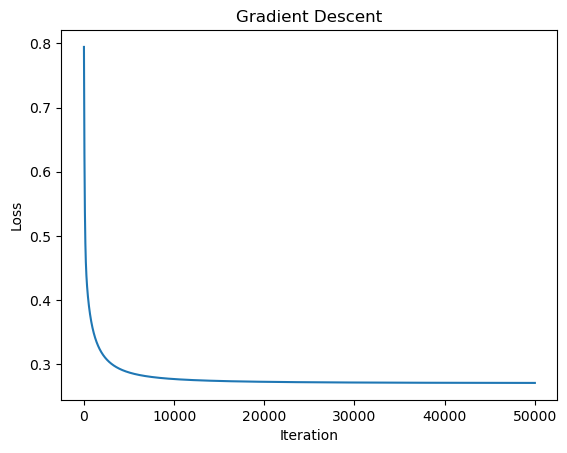

Learning Rate: 0.01, Iterations: 50000, Trained Weight Vectors: [-1.57972772  0.15590012  1.96710559  2.74562948 -0.23631742  3.29399107]
Iteration 0: Loss = 0.5297310649827475
Iteration 1000: Loss = 0.35397065444436987
Iteration 2000: Loss = 0.3183171507539755
Iteration 3000: Loss = 0.30247872245568397
Iteration 4000: Loss = 0.29370313427763806
Iteration 5000: Loss = 0.2882252924094917
Iteration 6000: Loss = 0.28453501621521843
Iteration 7000: Loss = 0.2819119581335332
Iteration 8000: Loss = 0.27997106780601877
Iteration 9000: Loss = 0.2784891538830616
Iteration 10000: Loss = 0.27732872995048025
Iteration 11000: Loss = 0.2764009719553441
Iteration 12000: Loss = 0.2756462384065908
Iteration 13000: Loss = 0.27502317779840774
Iteration 14000: Loss = 0.2745023279753733
Iteration 15000: Loss = 0.27406219764390927
Iteration 16000: Loss = 0.27368678318911077
Iteration 17000: Loss = 0.27336394783074863
Iteration 18000: Loss = 0.2730843361073812
Iteration 19000: Loss = 0.2728406302382893
Itera

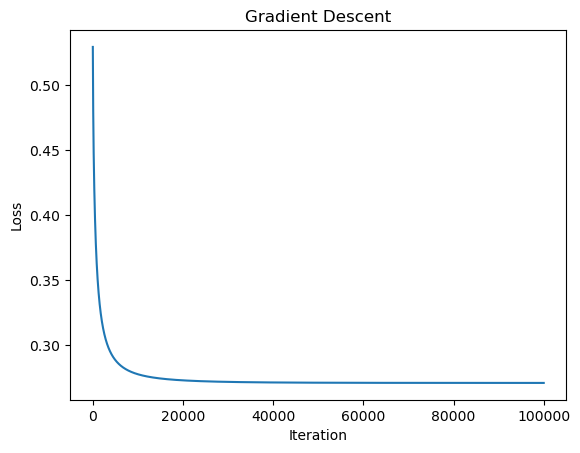

Learning Rate: 0.01, Iterations: 100000, Trained Weight Vectors: [-1.80423702  0.14532604  1.99393366  2.65683832 -0.20659097  3.40149736]
Iteration 0: Loss = 0.5290571370532596
Iteration 1000: Loss = 0.27848070185158746
Iteration 2000: Loss = 0.2729638928540066
Iteration 3000: Loss = 0.27155670673204513
Iteration 4000: Loss = 0.271048096342104
Iteration 5000: Loss = 0.27083471478925714
Iteration 6000: Loss = 0.27073744911571285
Iteration 7000: Loss = 0.2706908800225551
Iteration 8000: Loss = 0.27066791818848995
Iteration 9000: Loss = 0.27065639473186126


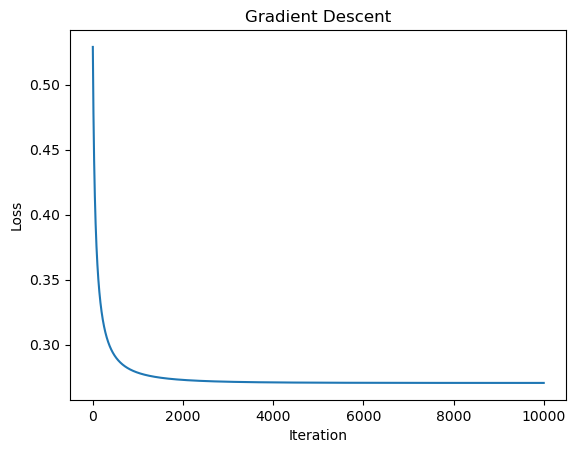

Learning Rate: 0.1, Iterations: 10000, Trained Weight Vectors: [-1.80212005  0.14541553  1.99374686  2.65768378 -0.20685491  3.40039713]
Iteration 0: Loss = 0.7819860249626445
Iteration 1000: Loss = 0.2780289695293915
Iteration 2000: Loss = 0.2729836699906064
Iteration 3000: Loss = 0.2716204269475112
Iteration 4000: Loss = 0.2710919462905926
Iteration 5000: Loss = 0.27085970745488425
Iteration 6000: Loss = 0.270750867129817
Iteration 7000: Loss = 0.27069791437038576
Iteration 8000: Loss = 0.27067156797227954
Iteration 9000: Loss = 0.27065827990322894
Iteration 10000: Loss = 0.27065152166456896
Iteration 11000: Loss = 0.2706480664872448
Iteration 12000: Loss = 0.27064629415886315
Iteration 13000: Loss = 0.2706453831012716
Iteration 14000: Loss = 0.2706449141185473
Iteration 15000: Loss = 0.27064467247537394
Iteration 16000: Loss = 0.27064454788987785
Iteration 17000: Loss = 0.27064448362864574
Iteration 18000: Loss = 0.2706444504727202
Iteration 19000: Loss = 0.27064443336215455
Iterati

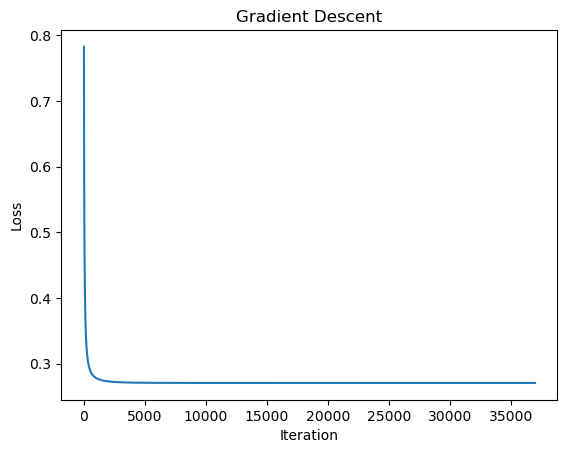

Learning Rate: 0.1, Iterations: 50000, Trained Weight Vectors: [-1.85405007  0.14255614  1.99938897  2.63708053 -0.19543411  3.42023278]
Iteration 0: Loss = 0.47431930716703463
Iteration 1000: Loss = 0.27630205765874616
Iteration 2000: Loss = 0.2722461836869692
Iteration 3000: Loss = 0.2712587695678031
Iteration 4000: Loss = 0.2709113725838811
Iteration 5000: Loss = 0.2707687474085563
Iteration 6000: Loss = 0.2707047583247486
Iteration 7000: Loss = 0.2706744323217927
Iteration 8000: Loss = 0.27065956768095795
Iteration 9000: Loss = 0.27065213129462334
Iteration 10000: Loss = 0.2706483651094595
Iteration 11000: Loss = 0.27064644358760026
Iteration 12000: Loss = 0.27064545884048347
Iteration 13000: Loss = 0.2706449527998367
Iteration 14000: Loss = 0.27064469231855126
Iteration 15000: Loss = 0.27064455809578825
Iteration 16000: Loss = 0.2706444888858758
Iteration 17000: Loss = 0.27064445318326247
Iteration 18000: Loss = 0.27064443476042543
Iteration 19000: Loss = 0.2706444252522685
Iterat

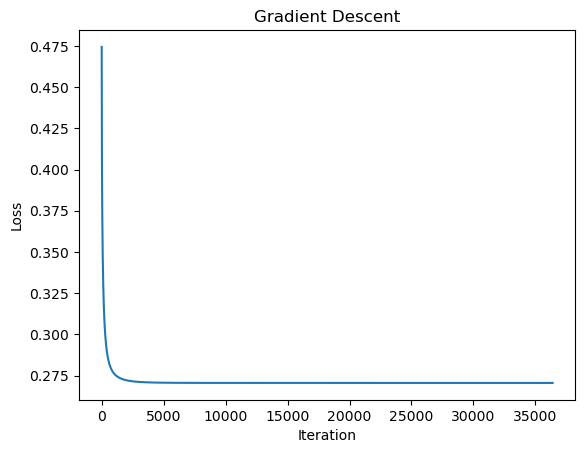

Learning Rate: 0.1, Iterations: 100000, Trained Weight Vectors: [-1.85405088  0.1425561   1.99938906  2.63708021 -0.19543391  3.42023306]


In [25]:
# Define a list of learning rates and iterations to try
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [10000, 50000, 100000]

# Dictionary to store the trained weight vectors for each combination
weight_vectors_dict = {}

for learning_rate in learning_rates:
    for iterations in iterations_list:
        logistic_model = LogitRegression(learning_rate, iterations)
        loss_values = logistic_model.fit(X_train, Y_train)

        # Get the trained weight vectors
        weight_vectors = logistic_model.weights

        # Store the weight vectors in the dictionary with a unique key
        key = (learning_rate, iterations)
        weight_vectors_dict[key] = weight_vectors

        # Use weight_vectors for predictions or further analysis

        # Print the weight vectors
        print("Learning Rate: {}, Iterations: {}, Trained Weight Vectors: {}".format(learning_rate, iterations, weight_vectors))

# Now, you have weight vectors for all combinations
# Access weight vectors using weight_vectors_dict[(learning_rate, iterations)]
